<a href="https://colab.research.google.com/github/Ebasurtos/Machine-laerning/blob/main/HackatonML_Grupo_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Bibliotecas y módulos

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

2. Preparación y Exploración de Datos

Estadísticas descriptivas:
       Gasto_Publicidad_Online  Num_Empleados  Tamaño_Tienda  \
count              7700.000000    7700.000000    7700.000000   
mean                 24.662146      27.843722     299.927242   
std                  14.418685      13.126774     114.417447   
min                   0.000582       5.002166     100.044093   
25%                  12.119437      16.384222     201.149556   
50%                  24.614581      28.031512     299.782171   
75%                  36.950866      39.306672     398.386135   
max                  49.985884      49.996617     499.878884   

       Indice_Competencia  Nivel_Descuento  Satisfaccion_Clientes  \
count         7700.000000      7700.000000            7700.000000   
mean             0.497395        15.021474               3.000620   
std              0.288362         8.687002               1.153250   
min              0.000006         0.002808               1.000034   
25%              0.248563         7.485990         

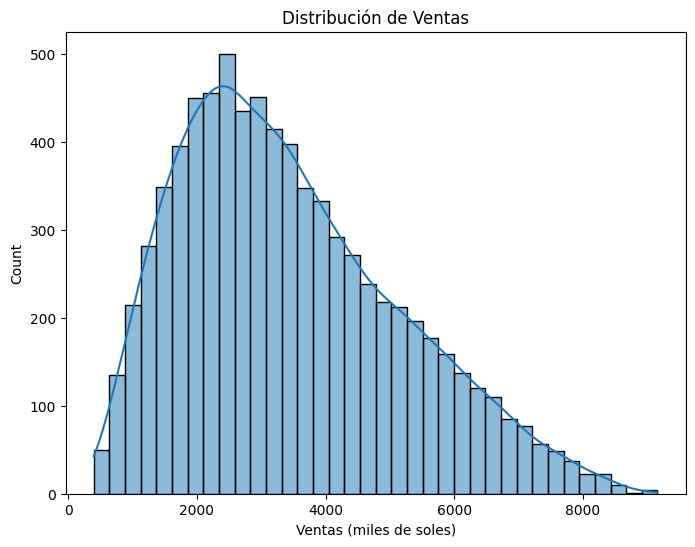

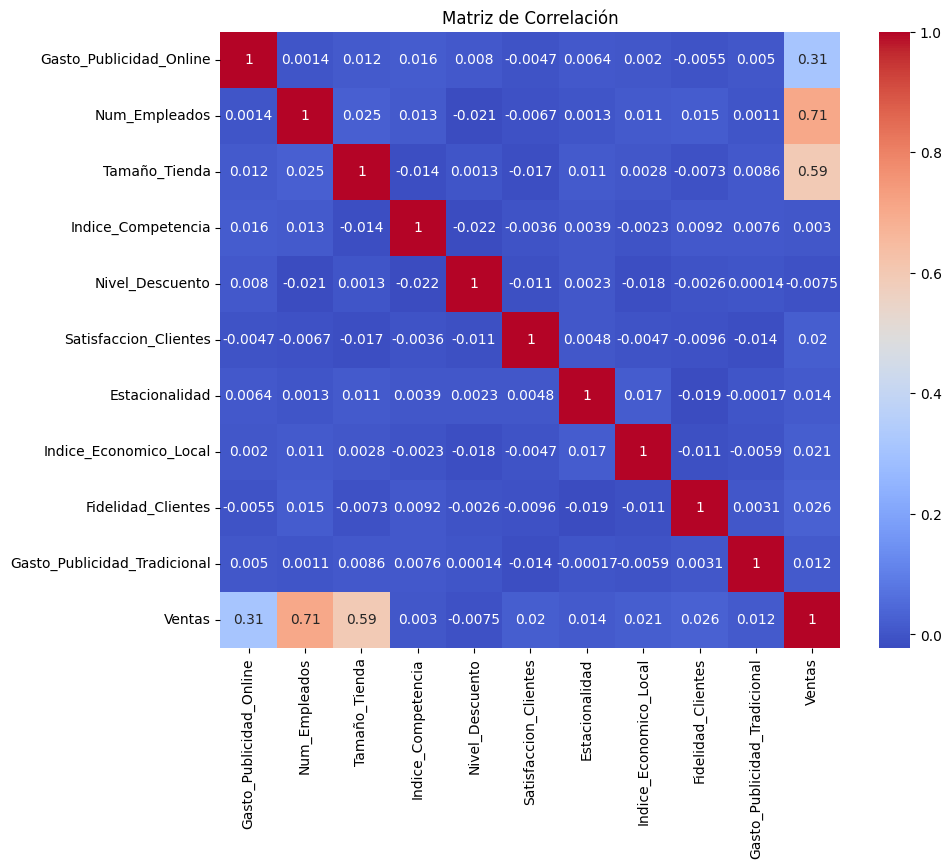

In [2]:
# Cargar los datasets
train_data = pd.read_csv('/content/hack_train_data.csv')
val_data = pd.read_csv('/content/hack_val_data.csv')

# Combinar los datasets
data = pd.concat([train_data, val_data], ignore_index=True)

# Definir variables predictoras y objetivo
X = data[['Gasto_Publicidad_Online', 'Num_Empleados', 'Tamaño_Tienda',
          'Indice_Competencia', 'Nivel_Descuento', 'Satisfaccion_Clientes',
          'Estacionalidad', 'Indice_Economico_Local', 'Fidelidad_Clientes',
          'Gasto_Publicidad_Tradicional']]
y = data['Ventas']

# Dividir en conjuntos de entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Análisis Exploratorio de Datos (EDA)
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(X_train.describe())
print("\n")

# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas (miles de soles)')
plt.show()
print("\n")

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()
print("\n")

3. Características

In [3]:
# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Generación de características polinómicas (Grado 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

4. Desarrollo y Entrenamiento de Modelos

In [6]:
# Función para calcular métricas
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r, _ = pearsonr(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r, r2

# Diccionario para almacenar métricas
results = {
    'Model': [],
    'MSE_Train': [], 'RMSE_Train': [], 'R_Train': [], 'R2_Train': [],
    'MSE_Val': [], 'RMSE_Val': [], 'R_Val': [], 'R2_Val': []
}

# Modelar Regresión Lineal
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred_lr = lr.predict(X_train_scaled)
y_val_pred_lr = lr.predict(X_val_scaled)
mse_train, rmse_train, r_train, r2_train = calculate_metrics(y_train, y_train_pred_lr)
mse_val, rmse_val, r_val, r2_val = calculate_metrics(y_val, y_val_pred_lr)
results['Model'].append('Linear Regression')
results['MSE_Train'].append(mse_train)
results['RMSE_Train'].append(rmse_train)
results['R_Train'].append(r_train)
results['R2_Train'].append(r2_train)
results['MSE_Val'].append(mse_val)
results['RMSE_Val'].append(mse_val)
results['R_Val'].append(r_val)
results['R2_Val'].append(r2_val)

# Modelar Regresión Polinómica sin regularización
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_train_pred_poly = poly_lr.predict(X_train_poly)
y_val_pred_poly = poly_lr.predict(X_val_poly)
mse_train, rmse_train, r_train, r2_train = calculate_metrics(y_train, y_train_pred_poly)
mse_val, rmse_val, r_val, r2_val = calculate_metrics(y_val, y_val_pred_poly)
results['Model'].append('Polynomial Regression')
results['MSE_Train'].append(mse_train)
results['RMSE_Train'].append(rmse_train)
results['R_Train'].append(r_train)
results['R2_Train'].append(r2_train)
results['MSE_Val'].append(mse_val)
results['RMSE_Val'].append(rmse_val)
results['R_Val'].append(r_val)
results['R2_Val'].append(r2_val)

# Modelar Regresión Lasso (L1)
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_poly, y_train)
y_train_pred_lasso = lasso.predict(X_train_poly)
y_val_pred_lasso = lasso.predict(X_val_poly)
mse_train, rmse_train, r_train, r2_train = calculate_metrics(y_train, y_train_pred_lasso)
mse_val, rmse_val, r_val, r2_val = calculate_metrics(y_val, y_val_pred_lasso)
results['Model'].append('Lasso Regression')
results['MSE_Train'].append(mse_train)
results['RMSE_Train'].append(rmse_train)
results['R_Train'].append(r_train)
results['R2_Train'].append(r2_train)
results['MSE_Val'].append(mse_val)
results['RMSE_Val'].append(rmse_val)
results['R_Val'].append(r_val)
results['R2_Val'].append(r2_val)

# Modelar Regresión Ridge (L2)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
y_train_pred_ridge = ridge.predict(X_train_poly)
y_val_pred_ridge = ridge.predict(X_val_poly)
mse_train, rmse_train, r_train, r2_train = calculate_metrics(y_train, y_train_pred_ridge)
mse_val, rmse_val, r_val, r2_val = calculate_metrics(y_val, y_val_pred_ridge)
results['Model'].append('Ridge Regression')
results['MSE_Train'].append(mse_train)
results['RMSE_Train'].append(rmse_train)
results['R_Train'].append(r_train)
results['R2_Train'].append(r2_train)
results['MSE_Val'].append(mse_val)
results['RMSE_Val'].append(rmse_val)
results['R_Val'].append(r_val)
results['R2_Val'].append(r2_val)

5. Evaluación y Comparación de Modelos


Resultados de los modelos:
                   Model      MSE_Train  RMSE_Train   R_Train  R2_Train  \
0      Linear Regression  211965.180037  460.396764  0.962817  0.927017   
1  Polynomial Regression    2577.918490   50.773206  0.999556  0.999112   
2       Lasso Regression    2608.342189   51.071932  0.999552  0.999102   
3       Ridge Regression    2577.966046   50.773675  0.999556  0.999112   

         MSE_Val       RMSE_Val     R_Val    R2_Val  
0  196087.996272  196087.996272  0.963261  0.927788  
1    2545.550736      50.453451  0.999532  0.999063  
2    2544.731682      50.445334  0.999535  0.999063  
3    2546.515148      50.463008  0.999532  0.999062  




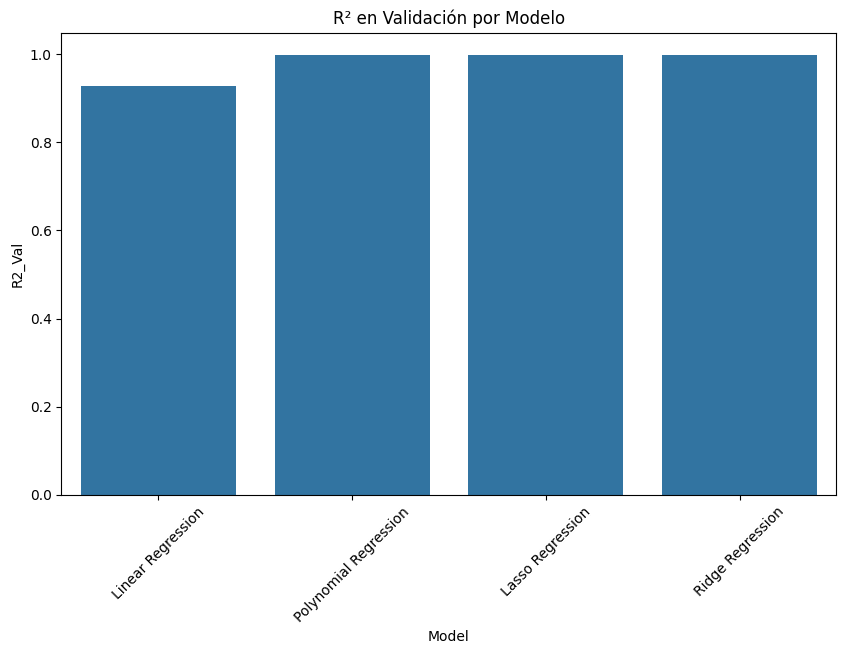

In [7]:
# Crear tabla de resultados
results_df = pd.DataFrame(results)
print("\nResultados de los modelos:")
print(results_df)
print("\n")

# Visualización de métricas
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2_Val', data=results_df)
plt.title('R² en Validación por Modelo')
plt.xticks(rotation=45)
plt.show()

6. Interpretación de Resultados y Conclusiones

In [8]:
# Coeficientes Lasso (identificar variables con coeficiente = 0)
lasso_coef = pd.Series(lasso.coef_, index=poly.get_feature_names_out())
print("\nNúmero de coeficientes reducidos a cero en Lasso:", (lasso_coef == 0).sum())

# Variables más relevantes según Lasso
print("\nVariables más relevantes (Lasso):")
print(lasso_coef[lasso_coef != 0].sort_values(key=abs, ascending=False).head(10))

# Variables más relevantes según Ridge
ridge_coef = pd.Series(ridge.coef_, index=poly.get_feature_names_out())
print("\nVariables más relevantes (Ridge):")
print(ridge_coef.sort_values(key=abs, ascending=False).head(10))


Número de coeficientes reducidos a cero en Lasso: 44

Variables más relevantes (Lasso):
x1       1180.492054
x2        982.150868
x0        519.874319
x1 x2     448.459933
x0^2       80.846267
x5         68.845811
x8         41.997077
x7         19.321956
x2 x8      15.788560
x6         12.946516
dtype: float64

Variables más relevantes (Ridge):
x1       1181.325332
x2        983.023746
x0        520.804883
x1 x2     449.479710
x0^2       82.074570
x5         69.953747
x8         43.065988
x7         20.326273
x2 x8      16.732214
x6         13.967749
dtype: float64


7. Respuestas a las Preguntas

In [9]:
print("\nRespuestas a las preguntas planteadas:")
print("1. Desempeño del Modelo:")
print(f"- MSE, RMSE, R y R² por modelo:\n{results_df}")
print(f"- Mejor modelo: {results_df.loc[results_df['R2_Val'].idxmax(), 'Model']} (basado en R² de validación).")

print("\n2. Impacto de la Regularización:")
print(f"- Coeficientes reducidos a cero en Lasso: {(lasso_coef == 0).sum()}")
print("- La regularización L1 (Lasso) elimina características irrelevantes, mientras que L2 (Ridge) reduce la magnitud de los coeficientes, mejorando la generalización.")

print("\n3. Importancia de las Variables:")
print("- Lasso selecciona variables al reducir coeficientes a cero, mientras que Ridge mantiene todas pero con menor magnitud.")
print("- Variables más relevantes (ver listas anteriores).")

print("\n4. Análisis de Sobreajuste:")
print("- Diferencias significativas entre métricas de entrenamiento y validación en la regresión polinómica sin regularización indican sobreajuste.")
print("- La regularización (Lasso y Ridge) mitiga el sobreajuste al penalizar coeficientes grandes.")

print("\n5. Mejoras y Aprendizajes:")
print("- Mejoras: Optimizar hiperparámetros (alpha, grado polinómico) con GridSearchCV, probar otros modelos (Random Forest, XGBoost), o incorporar interacciones adicionales.")
print("- Aprendizajes: Las características polinómicas capturan relaciones no lineales, pero requieren regularización para evitar sobreajuste. La regularización L1 es útil para selección de características, mientras que L2 estabiliza los coeficientes.")




Respuestas a las preguntas planteadas:
1. Desempeño del Modelo:
- MSE, RMSE, R y R² por modelo:
                   Model      MSE_Train  RMSE_Train   R_Train  R2_Train  \
0      Linear Regression  211965.180037  460.396764  0.962817  0.927017   
1  Polynomial Regression    2577.918490   50.773206  0.999556  0.999112   
2       Lasso Regression    2608.342189   51.071932  0.999552  0.999102   
3       Ridge Regression    2577.966046   50.773675  0.999556  0.999112   

         MSE_Val       RMSE_Val     R_Val    R2_Val  
0  196087.996272  196087.996272  0.963261  0.927788  
1    2545.550736      50.453451  0.999532  0.999063  
2    2544.731682      50.445334  0.999535  0.999063  
3    2546.515148      50.463008  0.999532  0.999062  
- Mejor modelo: Lasso Regression (basado en R² de validación).

2. Impacto de la Regularización:
- Coeficientes reducidos a cero en Lasso: 44
- La regularización L1 (Lasso) elimina características irrelevantes, mientras que L2 (Ridge) reduce la magnitud de 

8. Recomendaciones Estratégicas

In [10]:
print("\nRecomendaciones Estratégicas:")
print("- Priorizar inversiones en variables clave identificadas (por ejemplo, Gasto_Publicidad_Online, Estacionalidad).")
print("- Ajustar descuentos y estrategias de fidelidad según su impacto en las ventas.")
print("- Monitorear índices económicos y de competencia para anticipar cambios en las ventas.")


Recomendaciones Estratégicas:
- Priorizar inversiones en variables clave identificadas (por ejemplo, Gasto_Publicidad_Online, Estacionalidad).
- Ajustar descuentos y estrategias de fidelidad según su impacto en las ventas.
- Monitorear índices económicos y de competencia para anticipar cambios en las ventas.
